## Исследовательский анализ данных.

Импортируем необходимые библиотеки и загрузим данные:

In [386]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [243]:
data = pd.read_excel("/Users/liza/Downloads/2-ПМИ_18.08.2020_ДП.xlsx")

In [244]:
data.head()

,№ п/п,"Фамилия, имя, отчество",Медаль / диплом с отличием,Право поступления без вступительных испытаний,"Поступление на места в рамках квоты \nдля лиц, имеющих особое право",Поступление на места в рамках квоты\nцелевого приема,Наличие согласия на зачисление,комментарий,Математика,Информатика и ИКТ,...,Скидка по сумме баллов ЕГЭ,Возврат документов,Специализация конкурса,Регион проживания,Регион нахождения образовательного учреждения,Все выбранные конкурсы,текстовый маркер,комментарий.1,кто звонил,число в августе
0,1,1,+,Победитель заключительного этапа Всероссийской...,-,-,Да,NaN,100.0,88.0,...,25.0,-,NaN,Москва,Москва,ПМиИ (подл.),NaN,NaN,NaN,NaN
1,2,1,+,Победитель заключительного этапа Всероссийской...,-,-,Да,NaN,99.0,96.0,...,25.0,-,NaN,Москва,Москва,ПМиИ (подл.),NaN,NaN,NaN,NaN
2,3,1,-,Победитель заключительного этапа Всероссийской...,-,-,Да,NaN,94.0,NaN,...,NaN,-,NaN,Москва,Москва,ПМиИ (подл.),NaN,NaN,NaN,NaN
3,4,1,+,Победитель заключительного этапа Всероссийской...,-,-,Да,NaN,90.0,100.0,...,25.0,-,NaN,Калининградская область,Калининградская область,ПМиИ (подл.),NaN,NaN,NaN,NaN
4,5,1,+,Победитель заключительного этапа Всероссийской...,-,-,Да,NaN,100.0,88.0,...,50.0,-,NaN,Москва,Москва,ПМиИ (подл.),NaN,NaN,NaN,NaN


Фамилия, имя, отчество - константный признак, можно удалить. А столбец № п/п совпадает со столбцом индексов, его тоже удаляем.

In [245]:
data.drop(['Фамилия, имя, отчество', '№ п/п'], axis = 1, inplace=True)

Теперь в наших данных 1334 строки и 30 столбцов.

In [246]:
data.shape

(1334, 30)

Выведем все столбцы, которые имеют пропущенные значения:

In [247]:
data.isnull().sum()

Медаль / диплом с отличием                                                0
Право поступления без вступительных испытаний                          1150
Поступление на места в рамках квоты \nдля лиц, имеющих особое право       0
Поступление на места в рамках квоты\nцелевого приема                      0
Наличие согласия на зачисление                                            0
комментарий                                                            1266
Математика                                                               77
Информатика и ИКТ                                                       125
Русский язык                                                             92
Экзамен 4                                                              1334
Балл за итоговое сочинение                                              295
Балл за иные достижения                                                 556
Итоговая сумма баллов \nпо индивидуальным достижениям                   233
Сумма конкур

В двух столбцах количество пропусков равно количеству строк - cпециализация конкурса, Экзамен 4. Они не имеют значимости для исследовательского анализа, удалим их (полностью незаполненные строки).

In [248]:
data.drop(['Экзамен 4', 'Специализация конкурса'], axis = 1, inplace=True)

У нас есть объекты, в которых не заполнены баллы за ЕГЭ по всем трем предметам, необходимо удалить эти строки, т.к эти строки не являются информативными для дальнейшего анализа и могут привести к неправильным выводам.

In [249]:
data = data[~((data['Математика'].isnull() != 0) & (data['Информатика и ИКТ'].isnull() != 0) & (data['Русский язык'].isnull() != 0))]

Таким образом, мы удалили 60 строк из исходных данных.

In [250]:
data.shape

(1274, 28)

Рассмотрим более подробно признаки, в которых большое количество пропусков - текстовый маркер, комментарий.1, кто звонил, число в августе, комментарий.

In [251]:
data['комментарий.1'].value_counts()

однозначно ПМИ                                                                                                                                      3
ПМИ приорите, потом ПИ                                                                                                                              2
вообще только сюда подала документы                                                                                                                 1
если не ПМИ в Мосве, потом в питере, потом физ тех, потом ПИ                                                                                        1
на физ тех                                                                                                                                          1
                                                                                                                                                   ..
на физ тех,                                                                                         

In [252]:
data['комментарий'].value_counts()

однозначно ПМИ                                                                                                                                      3
ПМИ приорите, потом ПИ                                                                                                                              2
вообще только сюда подала документы                                                                                                                 1
если не ПМИ в Мосве, потом в питере, потом физ тех, потом ПИ                                                                                        1
на физ тех                                                                                                                                          1
                                                                                                                                                   ..
на физ тех,                                                                                         

Столбцы комментарий.1 и комментарий полностью идентичны. Выше выведены всевозможные значения этих столбцов.
Очень мало строк, в которых эти столбцы заполнены - только в 5% от всех данных, поэтому эти столбцы удаляем.

In [253]:
data.drop(['комментарий', 'комментарий.1'], axis = 1, inplace=True)

Посмотрим на возможные значения столбца кто звонил и текстовый маркер, число в августе. В процентном соотношении со всеми данными, количество пропусков в этих столбцах очень большое, больше информации мы узнать не сможем, поэтому эти столбцы тоже удаляем. 

In [254]:
data['кто звонил'].value_counts()

дина      36
дина      25
Ксения     8
0          1
Name: кто звонил, dtype: int64

In [255]:
 data['текстовый маркер'].value_counts()

да                30
нет               17
скорее нет        11
скорее да          7
не дозвонились     5
скорее нет         2
да                 2
Name: текстовый маркер, dtype: int64

In [256]:
 data['число в августе'].value_counts()

11.0    20
12.0    18
3.0     18
18.0     6
19.0     3
13.0     3
0.0      1
Name: число в августе, dtype: int64

Можно заметить, что среди заполненных данных абитуриенты чаще всего подавали документы 3, 11 и 12 августа.

In [257]:
data.drop(['текстовый маркер', 'кто звонил', 'число в августе'], axis = 1, inplace=True)

Разделим наши признаки на категориальные и числовые. Категориальных - 19, а числовых - 8.

In [258]:
categorical_columns = data.columns[data.dtypes == 'object']
num_columns = data.columns[data.dtypes == 'float64'].union(data.columns[data.dtypes == 'int64'])
len(categorical_columns), len(num_columns)

(15, 8)

Теперь выведем все признаки среди категориальных, имеющие пропуски:

In [259]:
data[categorical_columns].columns[data[categorical_columns].isnull().sum() != 0]

Index(['Право поступления без вступительных испытаний'], dtype='object')

Аналогично, среди числовых:

In [260]:
data[num_columns].columns[data[num_columns].isnull().sum() != 0]

Index(['Балл за иные достижения', 'Балл за итоговое сочинение',
       'Информатика и ИКТ',
       'Итоговая сумма баллов \nпо индивидуальным достижениям', 'Математика',
       'Русский язык', 'Скидка по сумме баллов ЕГЭ'],
      dtype='object')

Для оставшихся признаков заменим пропуски на пустые строки для категориальных признаков.
Для числовых признаков: балл за иные достижения, балл за итоговое сочинение, итоговая сумма баллов \nпо индивидуальным достижениям, скидка по сумме баллов ЕГЭ заменим пропуски на значение 0, так как, вероятнее всего, пропуск означает, что абитуриент не имеет иных достижений/не получил дополнительных баллов за сочинение/не получил по результам ЕГЭ скидку, для столбцов: Информатика и ИКТ, Математика, Русский язык заменим пропуски на средний балл.

In [261]:
first = ['Балл за иные достижения', 'Балл за итоговое сочинение', 'Итоговая сумма баллов \nпо индивидуальным достижениям', 'Скидка по сумме баллов ЕГЭ']
second = ['Информатика и ИКТ', 'Русский язык', 'Математика']

for column in categorical_columns:
    data[column].fillna('', inplace=True)
    
for column in second:
    data[column].fillna(data[column].mean(), inplace=True)
    
for column in first:
    data[column].fillna(0, inplace=True)

Теперь в наших данных нет пропущенных значений:

In [262]:
data.columns[data.isnull().sum() != 0]

Index([], dtype='object')

Посмотрим на основные показатели каждого признака: количество уникальных значений, медиана, стандартное отклонение, минимальное, максимальное и среднее значение, 25%, 50%, 75% квантили.

In [263]:
data.describe()

,Математика,Информатика и ИКТ,Русский язык,Балл за итоговое сочинение,Балл за иные достижения,Итоговая сумма баллов \nпо индивидуальным достижениям,Сумма конкурсных баллов,Скидка по сумме баллов ЕГЭ
count,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000
mean,87.140811,86.236559,89.819646,1.519623,2.676609,4.151491,259.529827,18.202512
std,10.335308,9.916238,8.447035,1.179162,2.713726,2.950197,40.814059,25.200434
min,37.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,80.000000,81.000000,85.000000,0.000000,0.000000,2.000000,249.000000,0.000000
50%,88.000000,86.236559,91.000000,2.000000,3.000000,5.000000,267.000000,0.000000
75%,96.000000,92.000000,96.000000,2.000000,5.000000,6.000000,285.000000,50.000000
max,100.000000,100.000000,100.000000,5.000000,10.000000,10.000000,310.000000,70.000000


Можно сделать вывод, что ошибок в записи числовых данных нет. Максимальное значение столбцов математика, информатика и ИКТ, русский язык - 100 баллов, за итоговое сочинение можно набрать от 0 до 5 дополнительных баллов, максимальный балл за другие достижения - 10, максимальная итоговая сумма баллов по индивидуальным достижениям - 10, соответственно и сумма конкурсных баллов - до 310 баллов, скидка по сумме баллов ЕГЭ - от 0 до 70 процентов. Также, можно заметить, что есть объекты, в которых сумма конкурсных баллов - 0 (если посмотреть на данные, то это у тех абитурентов, которые поступают в рамках установленной Правительством РФ квоты на образование иностранных граждан.

Далее, рассмотрим более подробно оставшиеся признаки.

#### 1. Медаль / диплом с отличием

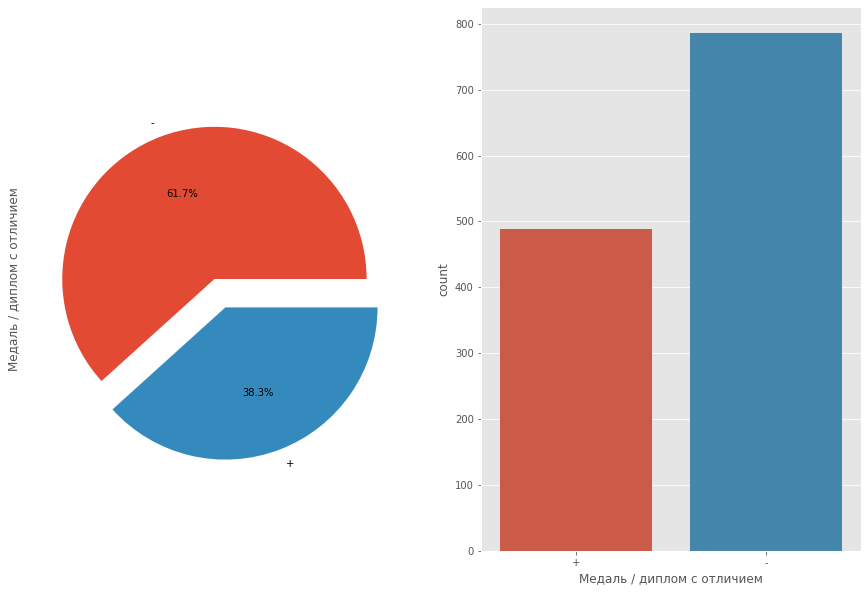

In [382]:
f,ax = plt.subplots(1,2, figsize=(15,10))
data['Медаль / диплом с отличием'].value_counts().plot.pie(explode=[0,0.20], autopct='%1.1f%%',ax=ax[0])
sns.countplot('Медаль / диплом с отличием',data=data)
plt.show()

Около 38% абитуриентов среди поступающих на ПМИ имеют диплом с отличием.

#### 2. Право поступления без вступительных испытаний

Вариантов поступления без вступительных вариантов много, поэтому посмотрим на 3 наиболее приоритетных среди абитурентов. Большая часть абитуентов не имеет право поступления без вступительных экзаменов, исключим объекты, в которых в значении - пропуск и посмотрим по каким олимпидам поступают больше всего абитуриентов.

In [315]:
data['Право поступления без вступительных испытаний'].value_counts(sort=True).head(3)

                                                                                   1132
Призер заключительного этапа Всероссийской олимпиады, предмет Информатика и ИКТ      40
Призер заключительного этапа Всероссийской олимпиады, предмет Математика             22
Name: Право поступления без вступительных испытаний, dtype: int64

In [310]:
df = data['Право поступления без вступительных испытаний'][data['Право поступления без вступительных испытаний'] != '']

In [316]:
df.value_counts(sort=True).head(5)

Призер заключительного этапа Всероссийской олимпиады, предмет Информатика и ИКТ         40
Призер заключительного этапа Всероссийской олимпиады, предмет Математика                22
Призер заключительного этапа Всероссийской олимпиады, предмет Экономика                 18
50 Олимпиада школьников «Ломоносов», предмет Математика, I уровень, Диплом I степени    17
Призер заключительного этапа Всероссийской олимпиады, предмет Физика                     7
Name: Право поступления без вступительных испытаний, dtype: int64

Text(0, 0.5, '')

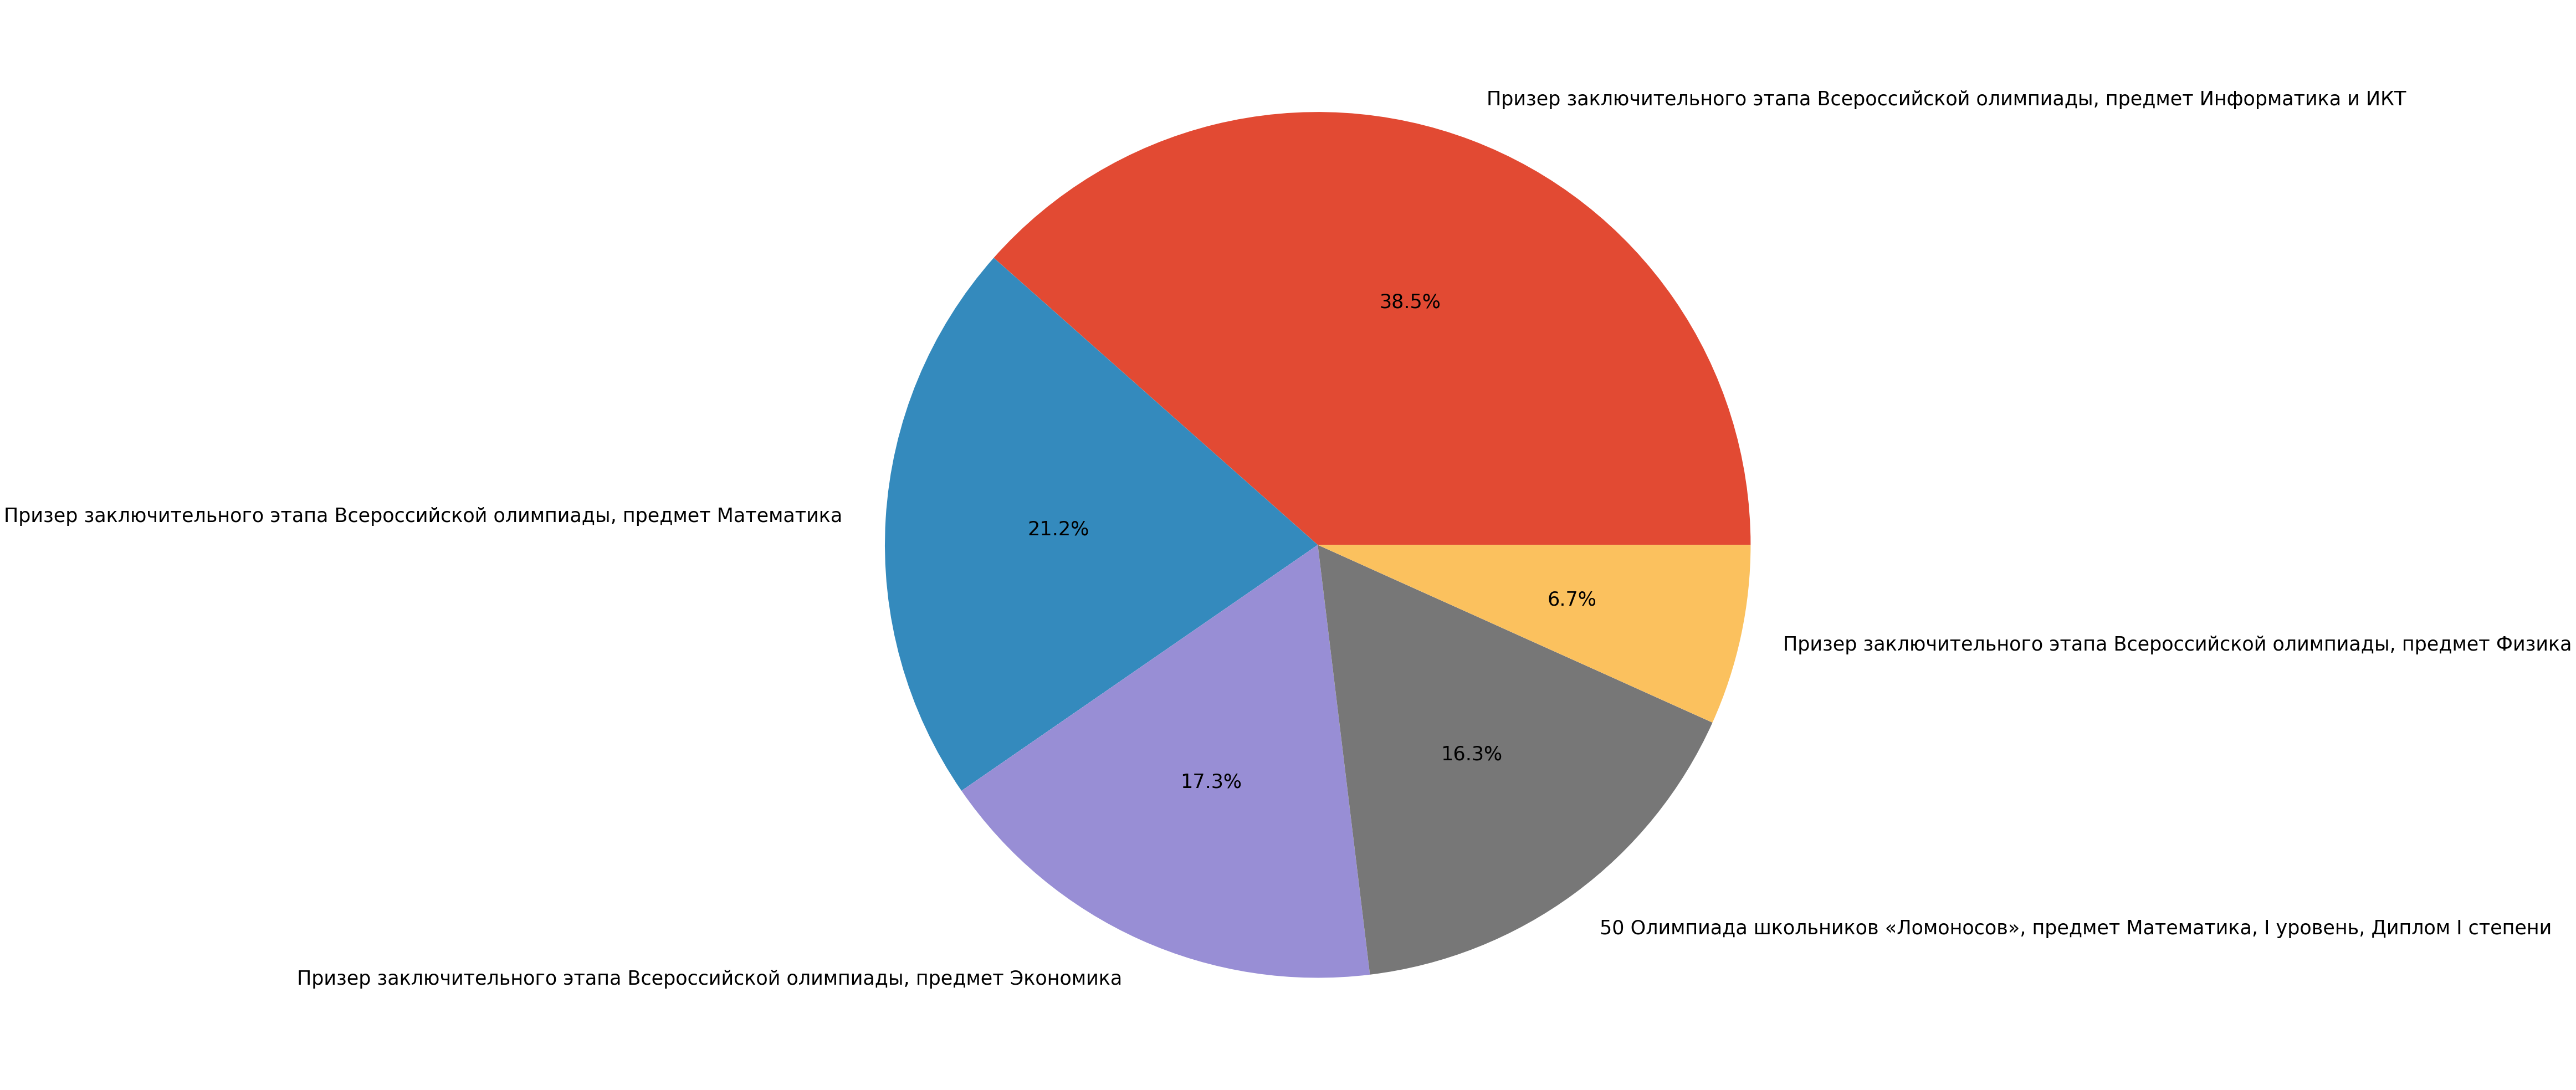

In [385]:
r = df.value_counts(sort=True).head(5)
r.plot(kind='pie',figsize=(35,45), autopct='%1.1f%%', fontsize=35)
plt.ylabel('')

Большая часть абитуриентов, поступающих без вступительных испытаний, призеры заключительного этапа Всероссийской олимпиады по Информатике, далее, по математике и экономике.

#### 3. Требуется общежитие на время обучения и форма обучения

Слева - диаграмма распределения абитуриентов, которым требуется/не требуется общежитие, справа - распределение абитуриентов по форме обучения.

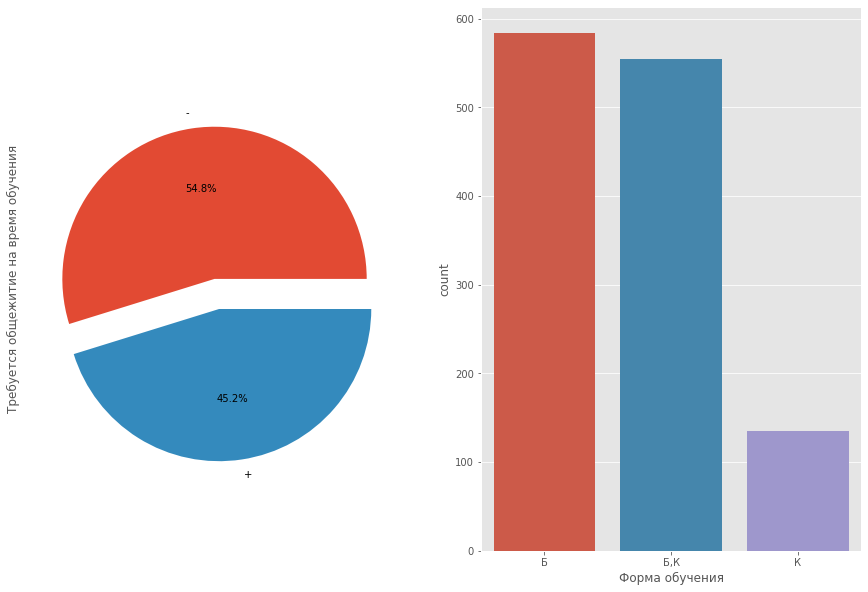

In [380]:
f,ax = plt.subplots(1,2, figsize=(15,10))
data['Требуется общежитие на время обучения'].value_counts().plot.pie(explode=[0,0.20], autopct='%1.1f%%',ax=ax[0])
sns.countplot('Форма обучения',data=data)
plt.show()

Около 54% студентов не требуется общежитие. У большиства абитуентов форма обучения - бюджет. 

#### 4. Поступление на места в рамках квоты для лиц, имеющих особое право  и поступление на места в рамках квоты целевого приема

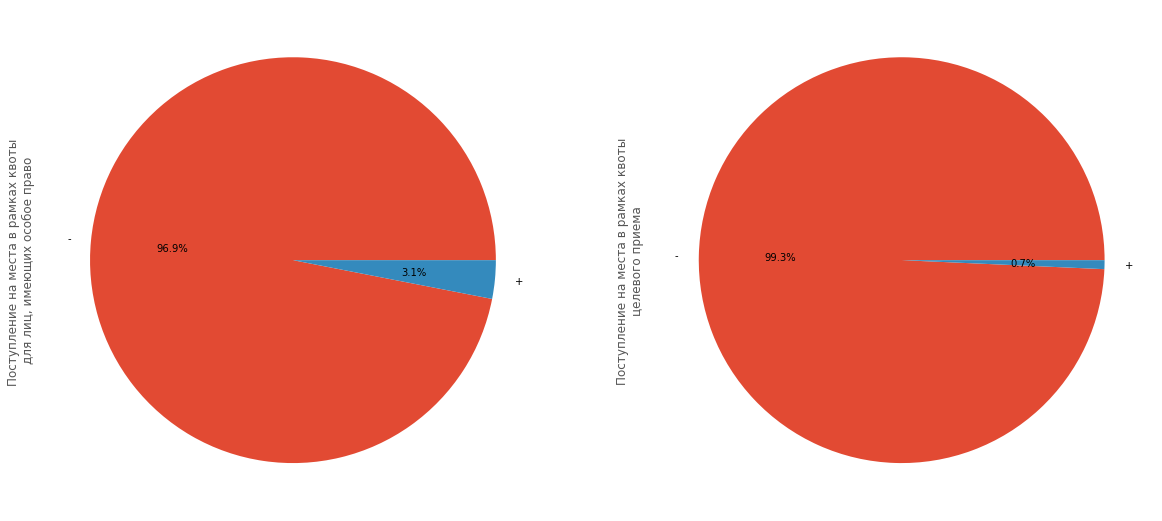

In [404]:
f,ax = plt.subplots(1,2, figsize=(20,35))
data['Поступление на места в рамках квоты \nдля лиц, имеющих особое право'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
data['Поступление на места в рамках квоты\nцелевого приема'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
plt.show()

Только 3% абитуриентов поступают в рамках квоты для лиц, имеющих особое право, а по целевому направлению - меньше 1% поступающих.

#### 5. Скидка по сумме баллов ЕГЭ 


Исключим абитуриентов, поступающих на бюджет и посмотрим, какую скидку получают студенты, поступающие на коммерцию.

In [405]:
data['Скидка по сумме баллов ЕГЭ'].unique()

array([25.,  0., 50., 70.])

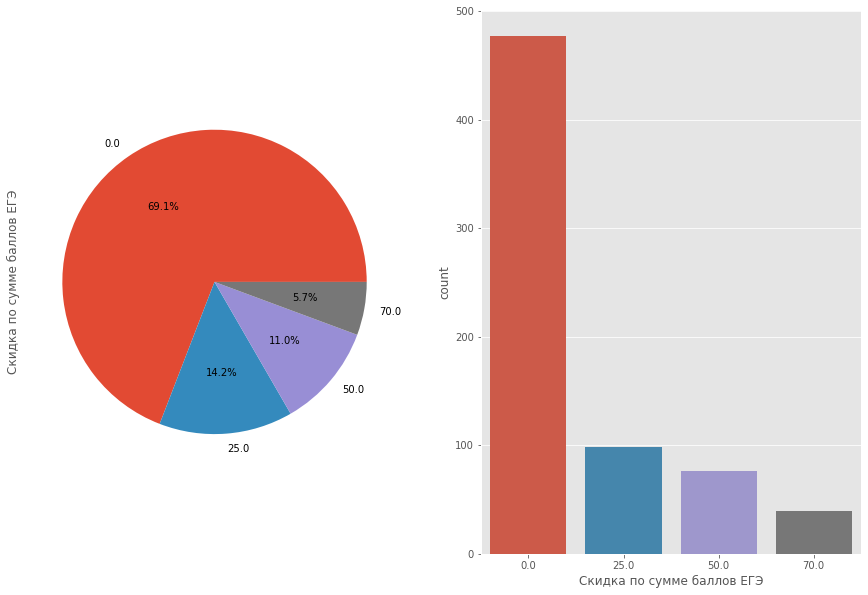

In [415]:
f,ax = plt.subplots(1,2, figsize=(15,10))
data[data['Форма обучения'] != 'Б']['Скидка по сумме баллов ЕГЭ'].value_counts().plot.pie( autopct='%1.1f%%',ax=ax[0])
sns.countplot('Скидка по сумме баллов ЕГЭ',data=data[data['Форма обучения'] != 'Б'])
plt.show()

К сожалению, по результатам ЕГЭ около 70% процентов поступающих не получают скидку на обучение вообще, около 15% получают скидку в размере 25%, 11% - в размере 50% и только 5,7% абитуриентов, поступающих на коммерцию, получают максимальную скидку - 70%.

#### 6. Баллы за ЕГЭ по математике, информатике и русскому языку.

Слева - распределение баллов по математике, справа - box plot в зависимости от формы обучения.

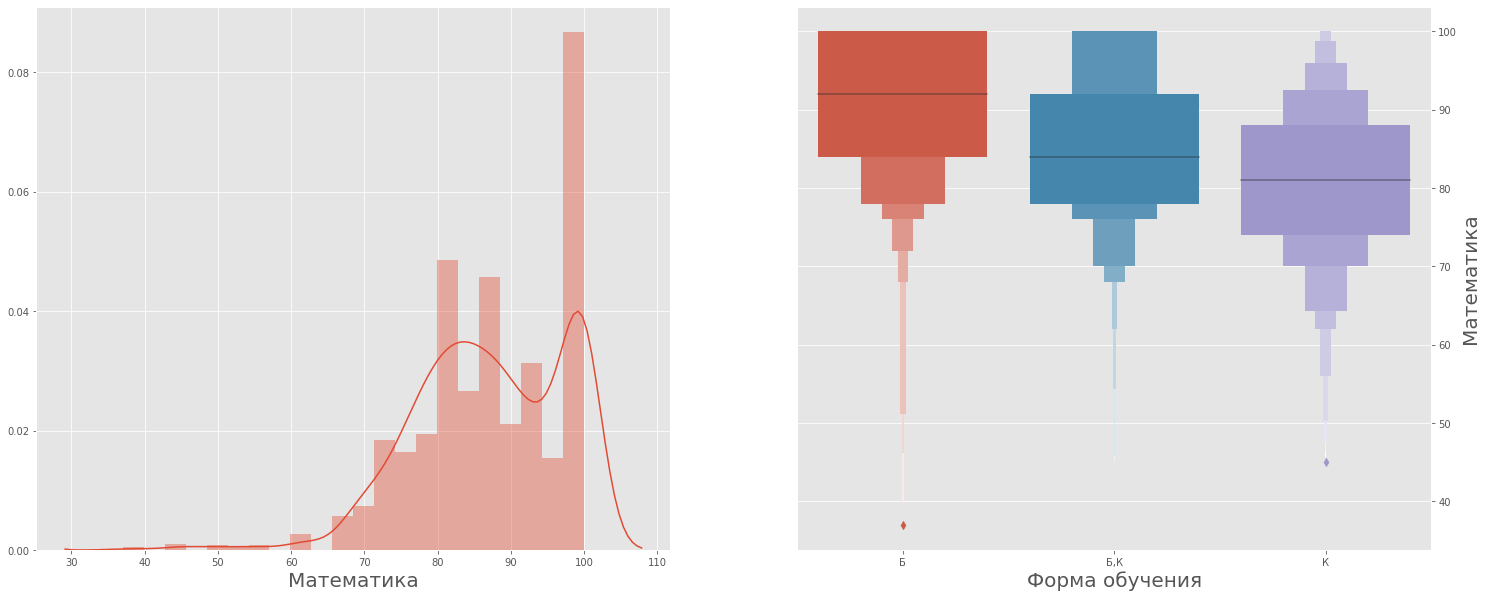

In [422]:
f, axes = plt.subplots(1, 2, figsize=(25,10))

sns.distplot(data['Математика'], ax = axes[0])
axes[0].set_xlabel('Математика', fontsize = 20)
axes[0].yaxis.tick_left()

ax = sns.boxenplot(x = 'Форма обучения', y = 'Математика', data = data,  ax = axes[1])
axes[1].set_xlabel('Форма обучения', fontsize = 20)
axes[1].set_ylabel('Математика', fontsize = 20)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

Среди поступающих абитуентов - большая часть имеют 100 баллов за ЕГЭ по математике, практически нет студентов с низкими баллами (меньше 60). Но довольно мало студентов имеют баллы от 95 до 100. Также, можно заметить, что средний балл по математике отличается в зависимости от формы обучения - на бюджете он больше, на коммерции ниже.


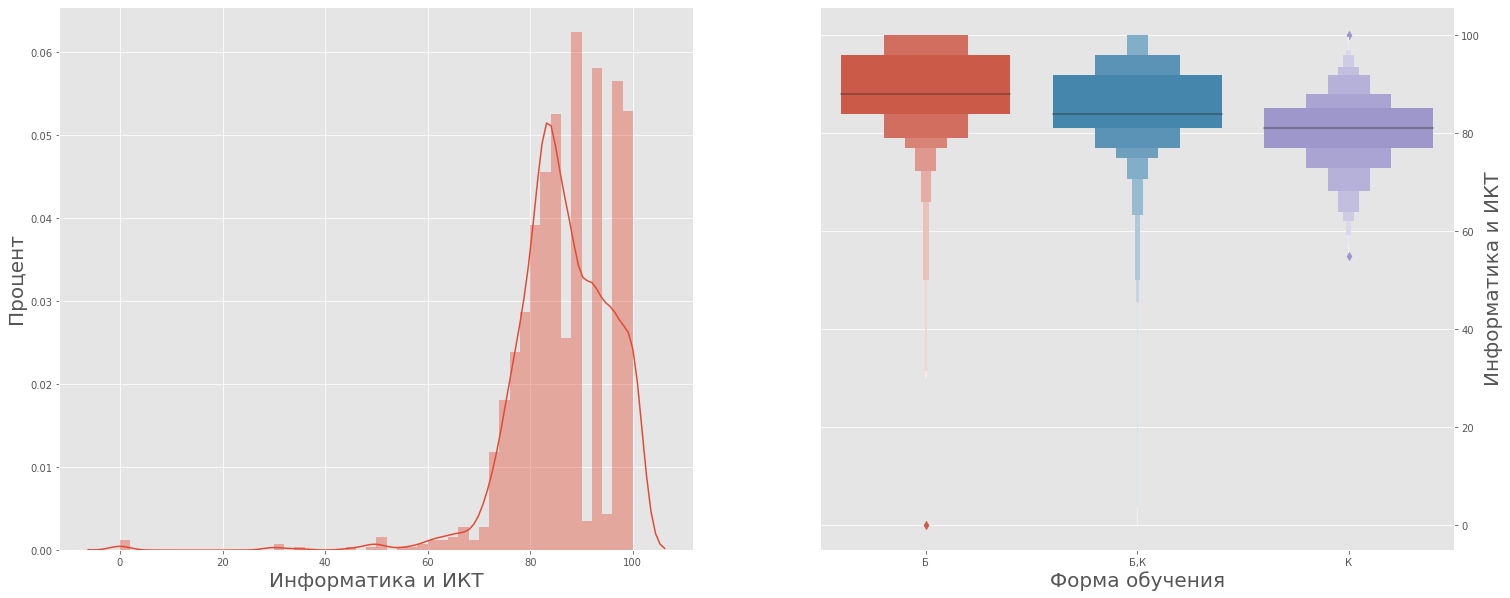

In [421]:
f, axes = plt.subplots(1, 2, figsize=(25,10))

sns.distplot(data['Информатика и ИКТ'], ax = axes[0])
axes[0].set_xlabel('Информатика и ИКТ', fontsize = 20)
axes[0].set_ylabel('Процент', fontsize=20)
axes[0].yaxis.tick_left()

ax = sns.boxenplot(x = 'Форма обучения', y = 'Информатика и ИКТ', data = data,  ax = axes[1])
axes[1].set_xlabel('Форма обучения', fontsize = 20)
axes[1].set_ylabel('Информатика и ИКТ', fontsize = 20)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

Правый график - аналогично графику выше (на бюджете средний балл выше), слева на графике распределения есть небольшой "хвост", т.е аномально низкое количество баллов за ЕГЭ по информатике.

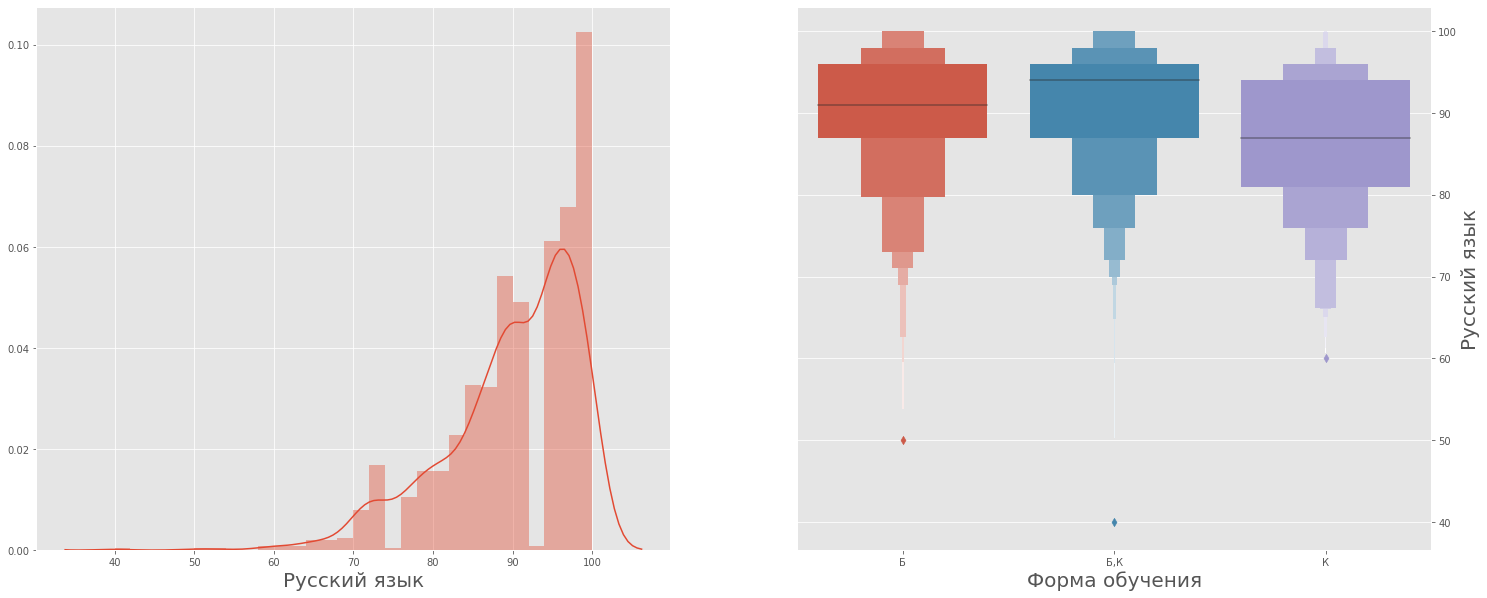

In [423]:
f, axes = plt.subplots(1, 2, figsize=(25,10))

sns.distplot(data['Русский язык'], ax = axes[0])
axes[0].set_xlabel('Русский язык', fontsize = 20)
axes[0].yaxis.tick_left()

ax = sns.boxenplot(x = 'Форма обучения', y = 'Русский язык', data = data,  ax = axes[1])
axes[1].set_xlabel('Форма обучения', fontsize = 20)
axes[1].set_ylabel('Русский язык', fontsize = 20)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

Больше абитуриентов, которые получили 100 баллов по русскому языку и практически нет студентов, которые набрали аномально низкое количество баллов. Средний балл в зависимости от формы обучения примерно равен среднему баллу по математике и информатике.

#### 7. Сумма конкурсных баллов


Посмотрим на распредление суммы конкурсных баллов:

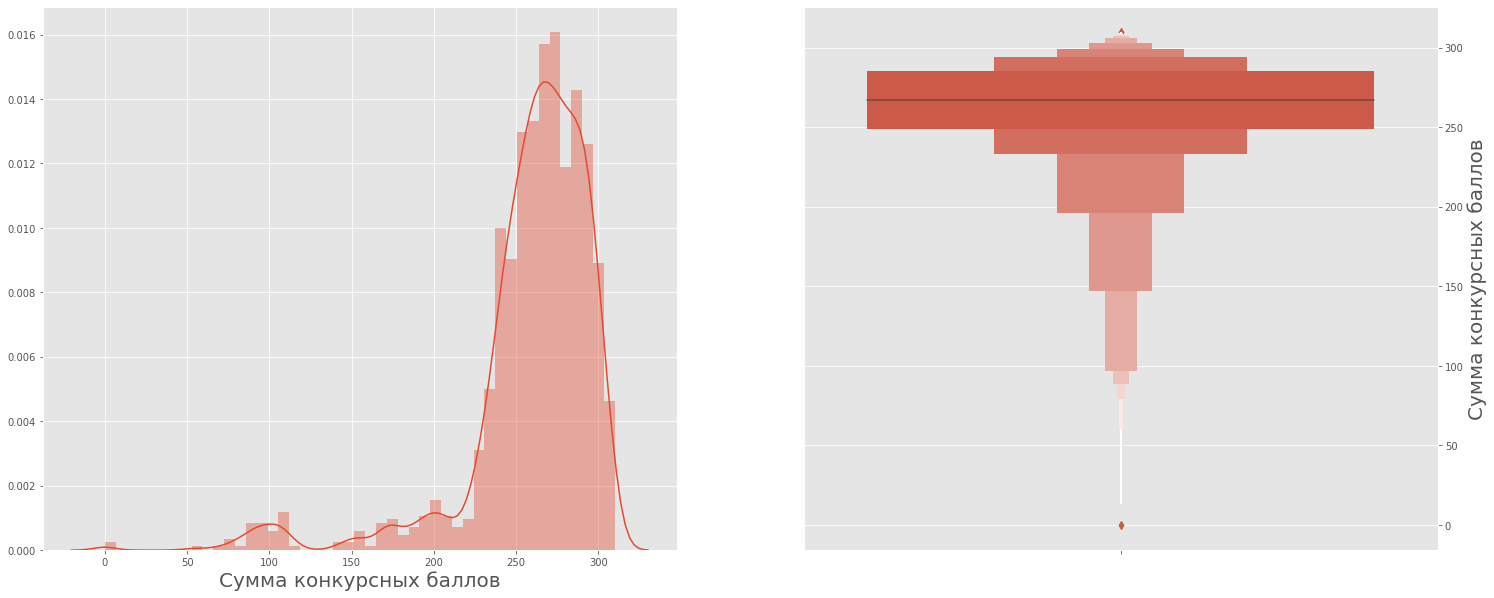

In [429]:
f, axes = plt.subplots(1, 2, figsize=(25,10))

sns.distplot(data['Сумма конкурсных баллов'], ax = axes[0])
axes[0].set_xlabel('Сумма конкурсных баллов', fontsize = 20)
axes[0].yaxis.tick_left()

ax = sns.boxenplot(y = 'Сумма конкурсных баллов', data = data,  ax = axes[1])
axes[1].set_ylabel('Сумма конкурсных баллов', fontsize = 20)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

Есть студенты, которые имеют общее количество баллов от 100 до 200 (слева "тяжелый хвост"), средний балл среди всех поступающих - около 260 баллов.

#### 8. Балл за итоговое сочинение и балл за иные достижения

In [434]:
data['Балл за итоговое сочинение'].value_counts(normalize=True)

2.0    0.649922
0.0    0.306122
5.0    0.043956
Name: Балл за итоговое сочинение, dtype: float64

In [436]:
data['Балл за иные достижения'].value_counts(normalize=True)

0.0     0.401099
3.0     0.266091
5.0     0.127159
8.0     0.065934
2.0     0.045526
6.0     0.035322
4.0     0.021978
10.0    0.020408
7.0     0.014129
9.0     0.002355
Name: Балл за иные достижения, dtype: float64

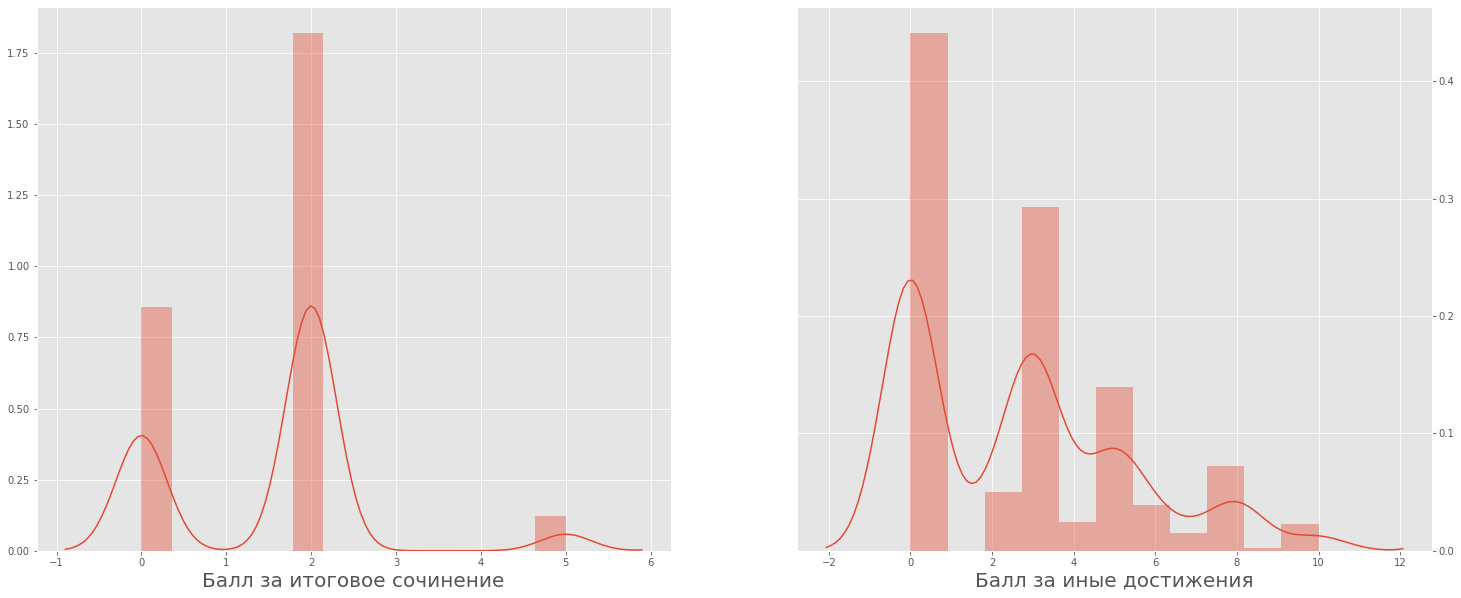

In [431]:
f, axes = plt.subplots(1, 2, figsize=(25,10))

sns.distplot(data['Балл за итоговое сочинение'], ax = axes[0])
axes[0].set_xlabel('Балл за итоговое сочинение', fontsize = 20)
axes[0].yaxis.tick_left()

sns.distplot(data['Балл за иные достижения'], ax = axes[1])
axes[1].set_xlabel('Балл за иные достижения', fontsize = 20)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

Очень мало студентов получают максимальный балл за сочинение, большинство студентов получают 2 балла. Почти половина студентов не имеют баллов за иные достижения, максимальный балл 10 имеют только 2% от всех поступающих.

#### 9. Регион проживания и регион нахождения образовательного учреждения

In [445]:
data['Регион проживания'].value_counts(sort=True, normalize=True).head(5)

Москва                  0.467033
Московская область      0.103611
Республика Татарстан    0.031397
Свердловская область    0.021193
Санкт-Петербург         0.020408
Name: Регион проживания, dtype: float64

In [446]:
data['Регион нахождения образовательного учреждения'].value_counts(sort=True, normalize=True).head(3)

Москва                  0.512559
Московская область      0.095761
Республика Татарстан    0.031397
Name: Регион нахождения образовательного учреждения, dtype: float64

Большинство поступающих - из Москвы и Московской области (больше 50 процентов),  далее, Республика Татарстан, Свердловская область и Санкт-Петербург. Аналогично, с регионом нахождения образовательного учреждения.

#### 9. Наличие согласия на зачисление и возврат документов

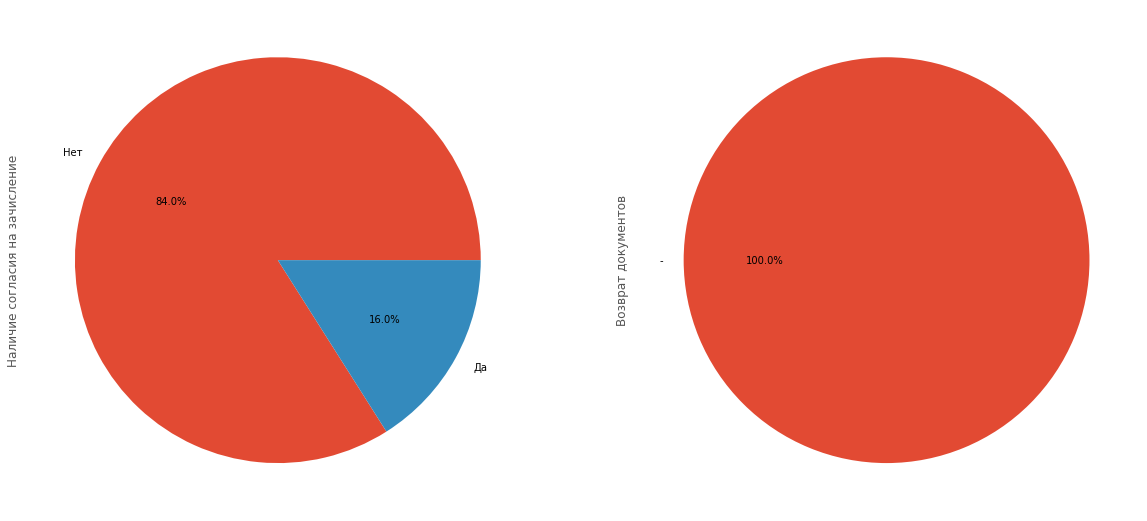

In [448]:
f,ax = plt.subplots(1,2, figsize=(20,35))
data['Наличие согласия на зачисление'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
data['Возврат документов'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
plt.show()

Интересно, что никто из абитуриентов не забрал документы обратно. Согласие на зачисление есть у 84% поступающих.

#### 9. Договор/договор оплачен

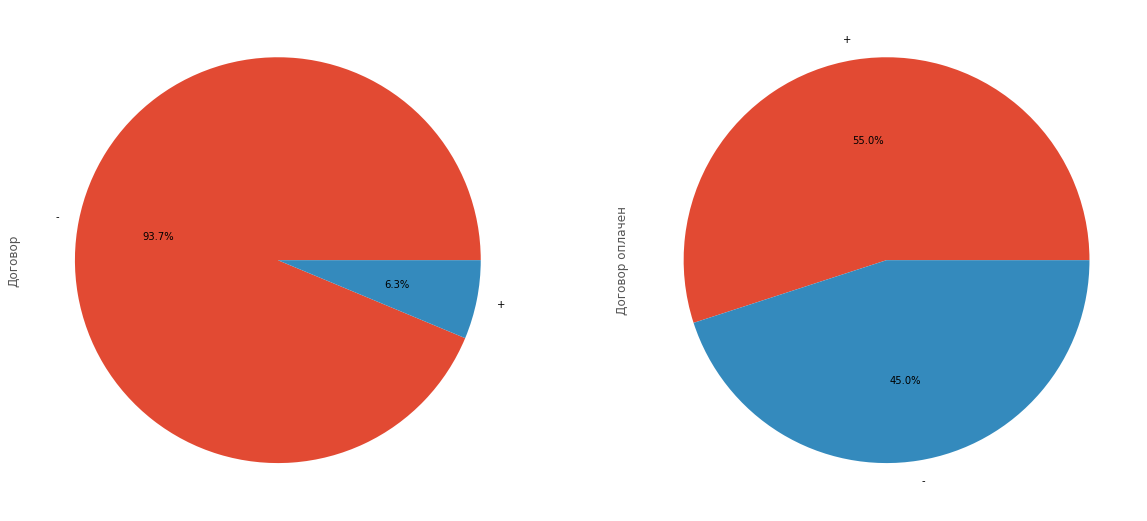

In [453]:
f,ax = plt.subplots(1,2, figsize=(20,35))
data['Договор'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
data[data['Договор'] == '+']['Договор оплачен'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
plt.show()

Договор заключили около 6 процентов абитуриентов, а среди тех, кто заключил договор только 55% его оплатили.

#### 10. Матрица корреляции

Построив матрицу корреляции, мы получим очень хороший обзор того, как признаки связаны друг с другом.

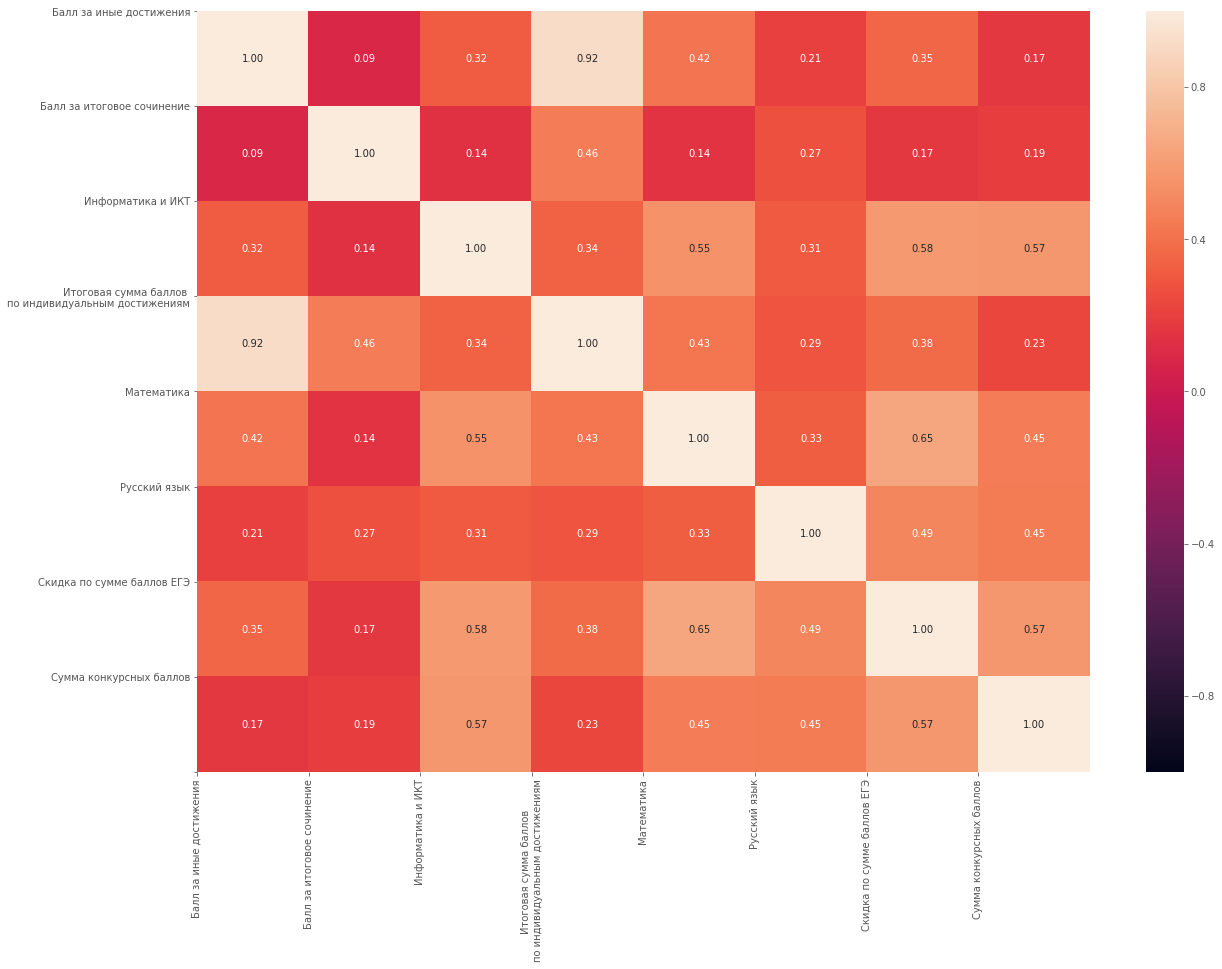

In [452]:
corr = data[num_columns].corr()

fig, ax = plt.subplots(figsize=(20, 14))

sns.heatmap(corr, annot=True, fmt=".2f", vmin = -1, vmax = 1)

plt.xticks(range(len(corr.columns)), corr.columns)

plt.yticks(range(len(corr.columns) + 1), corr.columns)

plt.show()

Сильная корреляция - балл за иные достижения и итоговая сумма баллов по индивидуальным достижениям.

Средняя корреляция - информатика и математика, скидка по сумме баллов и математика, соответственно скидка по сумме баллов и сумма конкурсных баллов, балл за иные достижения и математика, балл за итоговое сочинение и итоговая сумма баллов по индивидуальным достижениям, информатика и сумма конкурсных баллов, информатика и скидка по сумме баллов.

#### 11. Pairplot 

Pairplot показывает отношения между всеми парами переменных. Рассмотрим наиболее интересные признаки, которые имеют среднюю корреляцию между собой.

In [459]:
columns = ['Математика', 'Скидка по сумме баллов ЕГЭ', 'Балл за итоговое сочинение', 'Информатика и ИКТ']

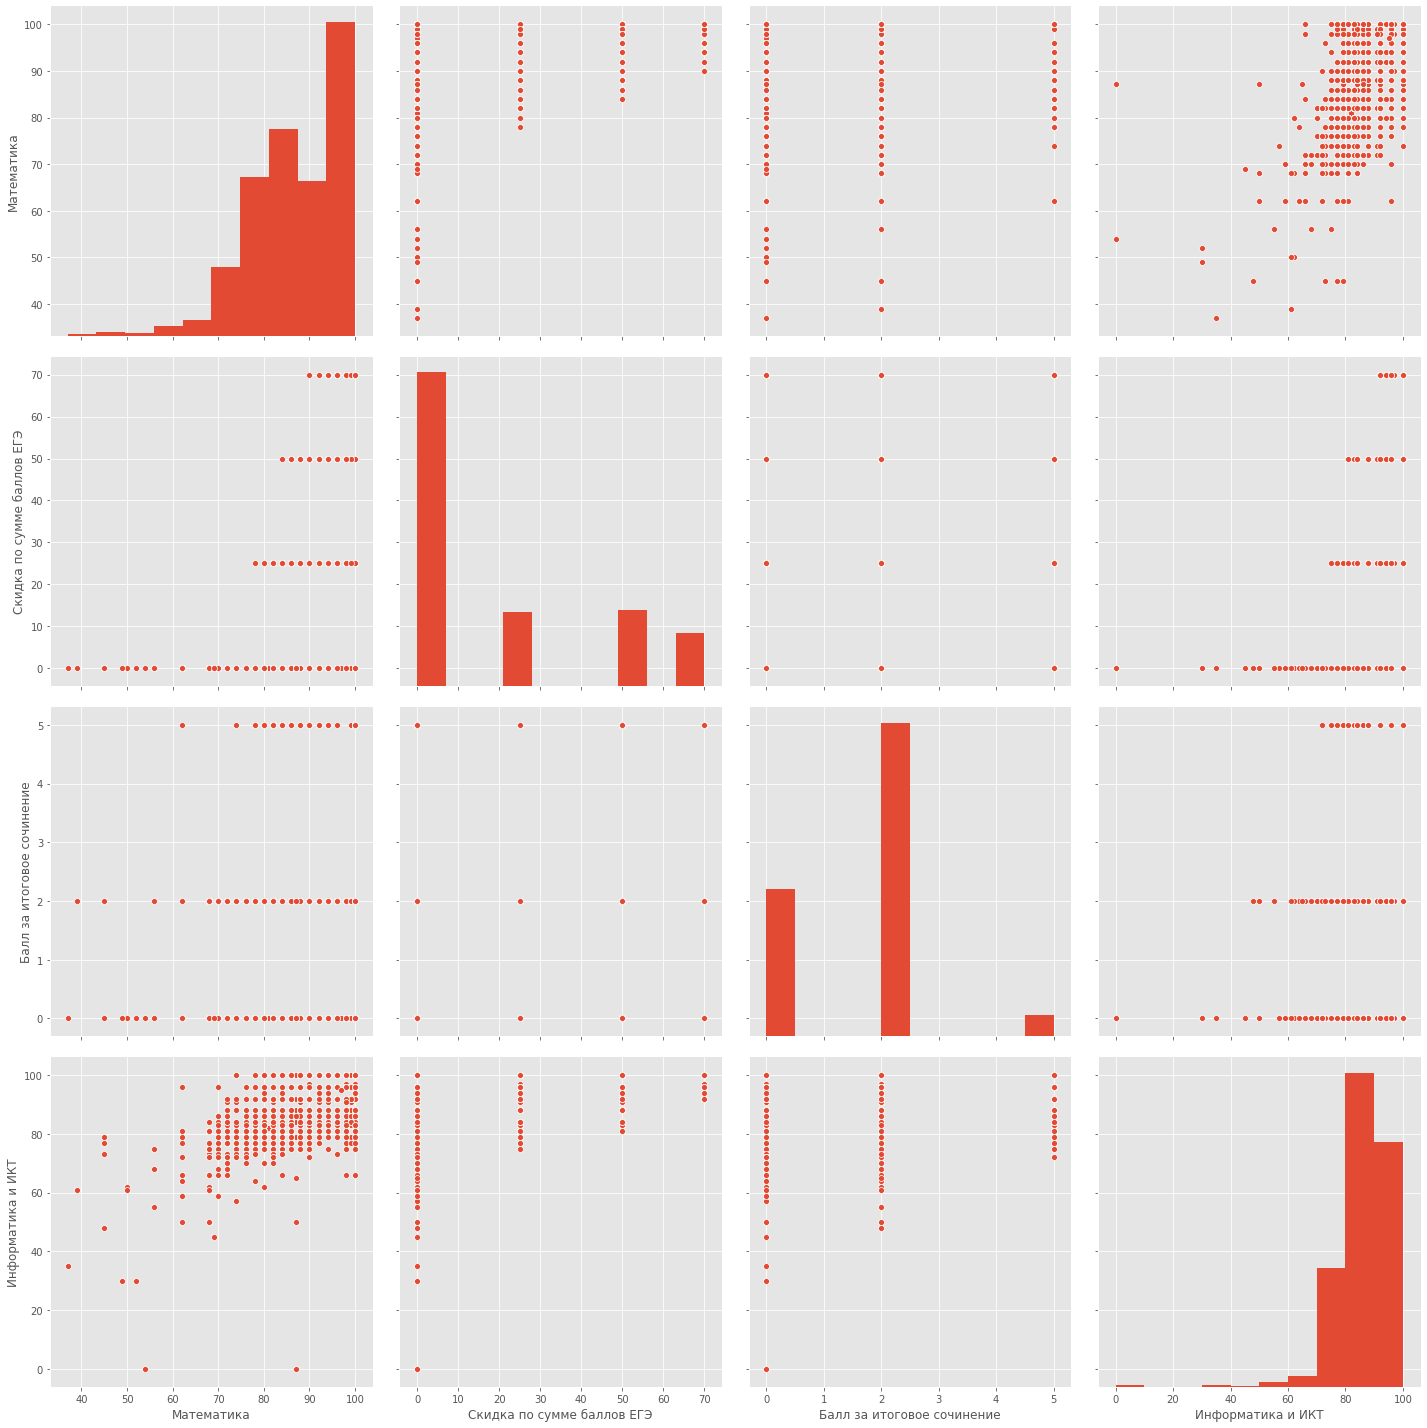

In [460]:
sns.pairplot(data[columns], height = 5, kind="scatter", palette=colors)